In [273]:
#importing relevant libraries 
import pandas as pd
import seaborn as sns 
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure
import re
import datetime
%matplotlib inline
matplotlib.rcParams['figure.figsize'] =(12,8) #use to adjust configuration of plots

#read in the data

movies_df = pd.read_csv('movies.csv')


In [274]:
#Checking data
movies_df.head()


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [275]:
#Checking for missing data
for col in movies_df.columns:
    pct_missing = np.mean(movies_df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))



name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [276]:
#Checking data types for columns
movies_df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [277]:
movies_df['budget'] = movies_df['budget'].fillna(0) #convert all NaN/null values to 0
movies_df['budget'] = movies_df['budget'].astype(int)
movies_df['gross'] = movies_df['gross'].fillna(0) #convert all NaN/null values to 0
movies_df['gross'] = movies_df['gross'].astype(int)
#This was done to make the data set look a little bit cleaner in a table.
#TODO take the year and the make it equal to released value. 


movies_df.sort_values(by=['gross'], inplace=False, ascending=False)
#Split the released on the open parenthesis 
relDtCtry = movies_df['released'].str.split(pat='(', expand=True)
relDtCtry.head(n=10)
#Join back to the data set 
movies_df = pd.concat([movies_df, relDtCtry], axis = 1)
#rename the newly made columns
movies_df = movies_df.rename(columns = {0:'release_date', 1:'release_country'})
#Remove the closing Parenthesis in the release_country column 
movies_df['release_country'] = movies_df['release_country'].astype(str).str.replace(')','')
#deleting the orignal released col
del movies_df['released']
#The data in the year and release_date col don't match up. I want to take the release_date year and replace the current year col
#Repeating the above steps, while dropping the year table and replacing with data found in release date
relyear = movies_df['release_date'].str.split(pat=',', expand=True)
movies_df = pd.concat([movies_df, relyear], axis = 1)
del movies_df['year']
movies_df = movies_df.rename(columns = {0:'Drop', 1:'year'})
del movies_df['Drop']

movies_df.head()

/var/folders/97/96zskdbj04q3_nh_nyxzlcm80000gn/T/ipykernel_2281/688981038.py:18: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  movies_df['release_country'] = movies_df['release_country'].astype(str).str.replace(')','')


,name,rating,genre,score,votes,director,writer,star,country,budget,gross,company,runtime,release_date,release_country,year
0,The Shining,R,Drama,8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,"June 13, 1980",United States,1980
1,The Blue Lagoon,R,Adventure,5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,"July 2, 1980",United States,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,"June 20, 1980",United States,1980
3,Airplane!,PG,Comedy,7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,"July 2, 1980",United States,1980
4,Caddyshack,R,Comedy,7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,"July 25, 1980",United States,1980


In [278]:
#Checking the full data set
#pd.set_option('display.max_rows',None)


In [279]:
#clean further by dropping any duplicates
movies_df.drop_duplicates()

,name,rating,genre,score,votes,director,writer,star,country,budget,gross,company,runtime,release_date,release_country,year
0,The Shining,R,Drama,8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,"June 13, 1980",United States,1980
1,The Blue Lagoon,R,Adventure,5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,"July 2, 1980",United States,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,"June 20, 1980",United States,1980
3,Airplane!,PG,Comedy,7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,"July 2, 1980",United States,1980
4,Caddyshack,R,Comedy,7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,"July 25, 1980",United States,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000,0,NaN,90.0,"October 23, 2020",United States,2020
7664,Dream Round,NaN,Comedy,4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,0,0,Cactus Blue Entertainment,90.0,"February 7, 2020",United States,2020
7665,Saving Mbango,NaN,Drama,5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750,0,Embi Productions,NaN,"April 27, 2020",Cameroon,2020
7666,It's Just Us,NaN,Drama,NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000,0,NaN,120.0,"October 1, 2020",United States,2020


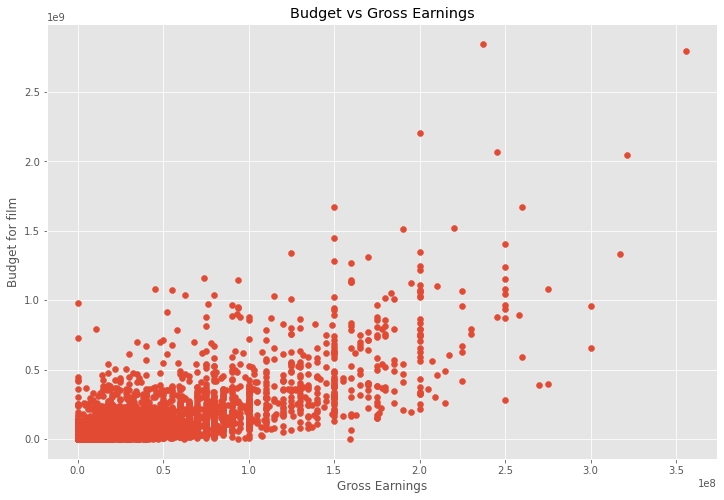

In [280]:
#Scatter plot with budget vs gross

plt.scatter(x=movies_df['budget'], y=movies_df['gross'])
plt.title("Budget vs Gross Earnings")
plt.xlabel("Gross Earnings")
plt.ylabel("Budget for film")
plt.show()

<AxesSubplot:xlabel='budget', ylabel='gross'>

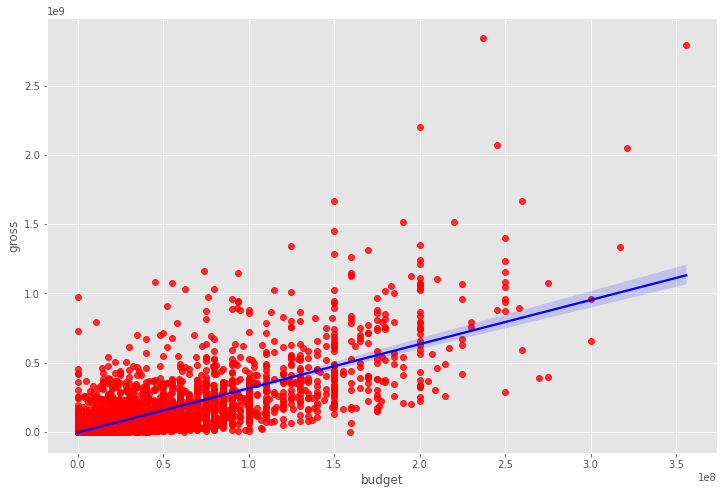

In [281]:
# Plot the budget vs gross using a regression plot in seaborn

sns.regplot(x="budget",y="gross", data=movies_df, scatter_kws={"color":"red"},line_kws={"color":"blue"})

In [282]:
#Start breaking down the correlation 
movies_df.corr(method="pearson")#pearson/default 
#There are other methods for corr``

,score,votes,budget,gross,runtime
score,1.000000,0.409182,0.055665,0.186392,0.399451
votes,0.409182,1.000000,0.486862,0.632834,0.309212
budget,0.055665,0.486862,1.000000,0.750157,0.269510
gross,0.186392,0.632834,0.750157,1.000000,0.245235
runtime,0.399451,0.309212,0.269510,0.245235,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

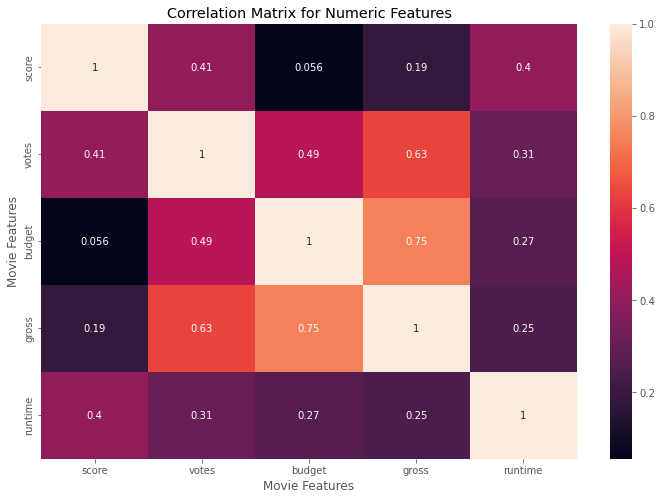

In [283]:
# high correlation between budget and gross
corr_matrix = movies_df.corr(method="pearson")
sns.heatmap(corr_matrix, annot=True)
plt.title("Correlation Matrix for Numeric Features")
plt.xlabel("Movie Features")
plt.ylabel("Movie Features")
plt.show

In [284]:
#assigning a number to every type that is not already a number so that I can use this information in the correlation matrix 
df_numerized = movies_df

for col_name in df_numerized.columns:
    if (df_numerized[col_name].dtype == "object"):
        df_numerized[col_name] = df_numerized[col_name].astype("category")
        df_numerized[col_name] = df_numerized[col_name].cat.codes

df_numerized

,name,rating,genre,score,votes,director,writer,star,country,budget,gross,company,runtime,release_date,release_country,year
0,6587,6,6,8.4,927000.0,2589,4014,1047,54,19000000,46998772,2319,146.0,1510,56,0
1,5573,6,1,5.8,65000.0,2269,1632,327,55,4500000,58853106,731,104.0,1311,56,0
2,5142,4,0,8.7,1200000.0,1111,2567,1745,55,18000000,538375067,1540,124.0,1568,56,0
3,286,4,4,7.7,221000.0,1301,2000,2246,55,3500000,83453539,1812,88.0,1311,56,0
4,1027,6,4,7.3,108000.0,1054,521,410,55,6000000,39846344,1777,98.0,1360,56,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,3705,-1,6,3.1,18.0,1500,2289,2421,55,7000,0,-1,90.0,2582,56,40
7664,1678,-1,4,4.7,36.0,774,2614,1886,55,0,0,539,90.0,975,56,40
7665,4717,-1,6,5.7,29.0,2061,2683,2040,55,58750,0,941,NaN,162,8,40
7666,2843,-1,6,NaN,NaN,1184,1824,450,55,15000,0,-1,120.0,2462,56,40


<function matplotlib.pyplot.show(close=None, block=None)>

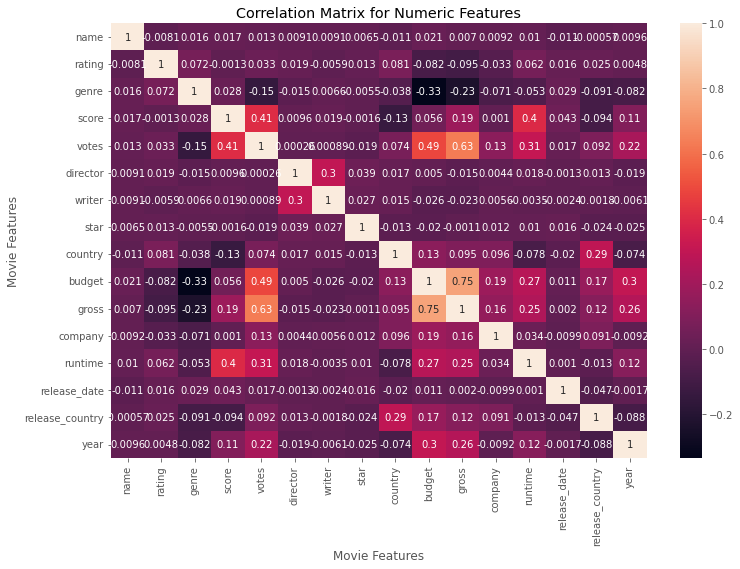

In [285]:
corr_matrix = df_numerized.corr(method="pearson")
sns.heatmap(corr_matrix, annot=True)
plt.title("Correlation Matrix for Numeric Features")
plt.xlabel("Movie Features")
plt.ylabel("Movie Features")
plt.show

In [286]:
df_numerized.corr()

,name,rating,genre,score,votes,director,writer,star,country,budget,gross,company,runtime,release_date,release_country,year
name,1.000000,-0.008069,0.016355,0.017097,0.013088,0.009079,0.009081,0.006472,-0.010737,0.020548,0.006989,0.009211,0.010392,-0.011223,-0.000569,0.009553
rating,-0.008069,1.000000,0.072423,-0.001314,0.033225,0.019483,-0.005921,0.013405,0.081244,-0.081939,-0.095450,-0.032943,0.062145,0.015735,0.025061,0.004829
genre,0.016355,0.072423,1.000000,0.027965,-0.145307,-0.015258,0.006567,-0.005477,-0.037615,-0.334021,-0.234297,-0.071067,-0.052711,0.029039,-0.090843,-0.082070
score,0.017097,-0.001314,0.027965,1.000000,0.409182,0.009559,0.019416,-0.001609,-0.133348,0.055665,0.186392,0.001030,0.399451,0.042918,-0.094147,0.105341
votes,0.013088,0.033225,-0.145307,0.409182,1.000000,0.000260,0.000892,-0.019282,0.073625,0.486862,0.632834,0.133204,0.309212,0.017111,0.092410,0.219954
director,0.009079,0.019483,-0.015258,0.009559,0.000260,1.000000,0.299067,0.039234,0.017490,0.004976,-0.014916,0.004404,0.017624,-0.001275,0.013293,-0.018620
writer,0.009081,-0.005921,0.006567,0.019416,0.000892,0.299067,1.000000,0.027245,0.015343,-0.025911,-0.022997,0.005646,-0.003511,-0.002421,-0.001848,-0.006134
star,0.006472,0.013405,-0.005477,-0.001609,-0.019282,0.039234,0.027245,1.000000,-0.012998,-0.019952,-0.001129,0.012442,0.010174,0.015597,-0.023568,-0.025288
country,-0.010737,0.081244,-0.037615,-0.133348,0.073625,0.017490,0.015343,-0.012998,1.000000,0.131720,0.095325,0.095548,-0.078412,-0.020063,0.293283,-0.074166
budget,0.020548,-0.081939,-0.334021,0.055665,0.486862,0.004976,-0.025911,-0.019952,0.131720,1.000000,0.750157,0.186474,0.269510,0.010643,0.166433,0.302266


In [288]:
correlation_matrix = df_numerized.corr()
corr_pairs = correlation_matrix.unstack()

sorted_pairs = corr_pairs.sort_values()
sorted_pairs

genre            budget            -0.334021
budget           genre             -0.334021
genre            gross             -0.234297
gross            genre             -0.234297
genre            votes             -0.145307
                                      ...   
score            score              1.000000
genre            genre              1.000000
rating           rating             1.000000
release_country  release_country    1.000000
year             year               1.000000
Length: 256, dtype: float64

In [290]:
high_corr = sorted_pairs[(sorted_pairs) > 0.5]
high_corr

votes            gross              0.632834
gross            votes              0.632834
                 budget             0.750157
budget           gross              0.750157
name             name               1.000000
release_date     release_date       1.000000
runtime          runtime            1.000000
company          company            1.000000
gross            gross              1.000000
budget           budget             1.000000
country          country            1.000000
star             star               1.000000
writer           writer             1.000000
director         director           1.000000
votes            votes              1.000000
score            score              1.000000
genre            genre              1.000000
rating           rating             1.000000
release_country  release_country    1.000000
year             year               1.000000
dtype: float64

Votes and Budget have the highest correlation to gross revenue

